# *E. coli* Simulations

In [1]:
# Make sure notebook runs out of vivarium-ecoli directory
import sys, os
notebook_path = sys.path[0][:sys.path[0].index('notebooks')]
sys.path.append(notebook_path)
os.chdir(sys.path[-1])
cwd = os.getcwd()

In [14]:
import os
from ecoli.experiments.ecoli_master_sim import EcoliSim, CONFIG_DIR_PATH
from vivarium.core.engine import pf
from vivarium.core.composer import Composite
from vivarium.plots.simulation_output import plot_variables
from vivarium.plots.topology import plot_topology
from ecoli.plots.topology import get_ecoli_master_topology_settings

## initialize `EcoliSim` from file

In [3]:
sim = EcoliSim.from_file(CONFIG_DIR_PATH + "no_partition.json")
sim.total_time = 10
sim.divide = False
sim.progress_bar = False
sim.log_updates = False
sim.raw_output = False
sim.build_ecoli()

## print the processes

In [4]:
print(pf(sim.ecolprocesses))

{ 'ecoli-chromosome-replication': <class 'ecoli.processes.chromosome_replication.ChromosomeReplication'>,
  'ecoli-chromosome-structure': <class 'ecoli.processes.chromosome_structure.ChromosomeStructure'>,
  'ecoli-complexation': <class 'ecoli.processes.complexation.Complexation'>,
  'ecoli-equilibrium': <class 'ecoli.processes.equilibrium.Equilibrium'>,
  'ecoli-mass-listener': <class 'ecoli.processes.listeners.mass_listener.MassListener'>,
  'ecoli-metabolism': <class 'ecoli.processes.metabolism.Metabolism'>,
  'ecoli-polypeptide-elongation': <class 'ecoli.processes.polypeptide_elongation.PolypeptideElongation'>,
  'ecoli-polypeptide-initiation': <class 'ecoli.processes.polypeptide_initiation.PolypeptideInitiation'>,
  'ecoli-protein-degradation': <class 'ecoli.processes.protein_degradation.ProteinDegradation'>,
  'ecoli-rna-degradation': <class 'ecoli.processes.rna_degradation.RnaDegradation'>,
  'ecoli-tf-binding': <class 'ecoli.processes.tf_binding.TfBinding'>,
  'ecoli-transcript

## print the topology

In [5]:
print(pf(sim.topology))

{ 'ecoli-chromosome-replication': { 'active_replisomes': ( 'unique',
                                                           'active_replisome'),
                                    'chromosome_domains': ( 'unique',
                                                            'chromosome_domain'),
                                    'dntps': ('bulk',),
                                    'environment': ('environment',),
                                    'full_chromosomes': ( 'unique',
                                                          'full_chromosome'),
                                    'listeners': ('listeners',),
                                    'oriCs': ('unique', 'oriC'),
                                    'ppi': ('bulk',),
                                    'replisome_monomers': ('bulk',),
                                    'replisome_trimers': ('bulk',)},
  'ecoli-chromosome-structure': { 'DnaA_boxes': ('unique', 'DnaA_box'),
                                  

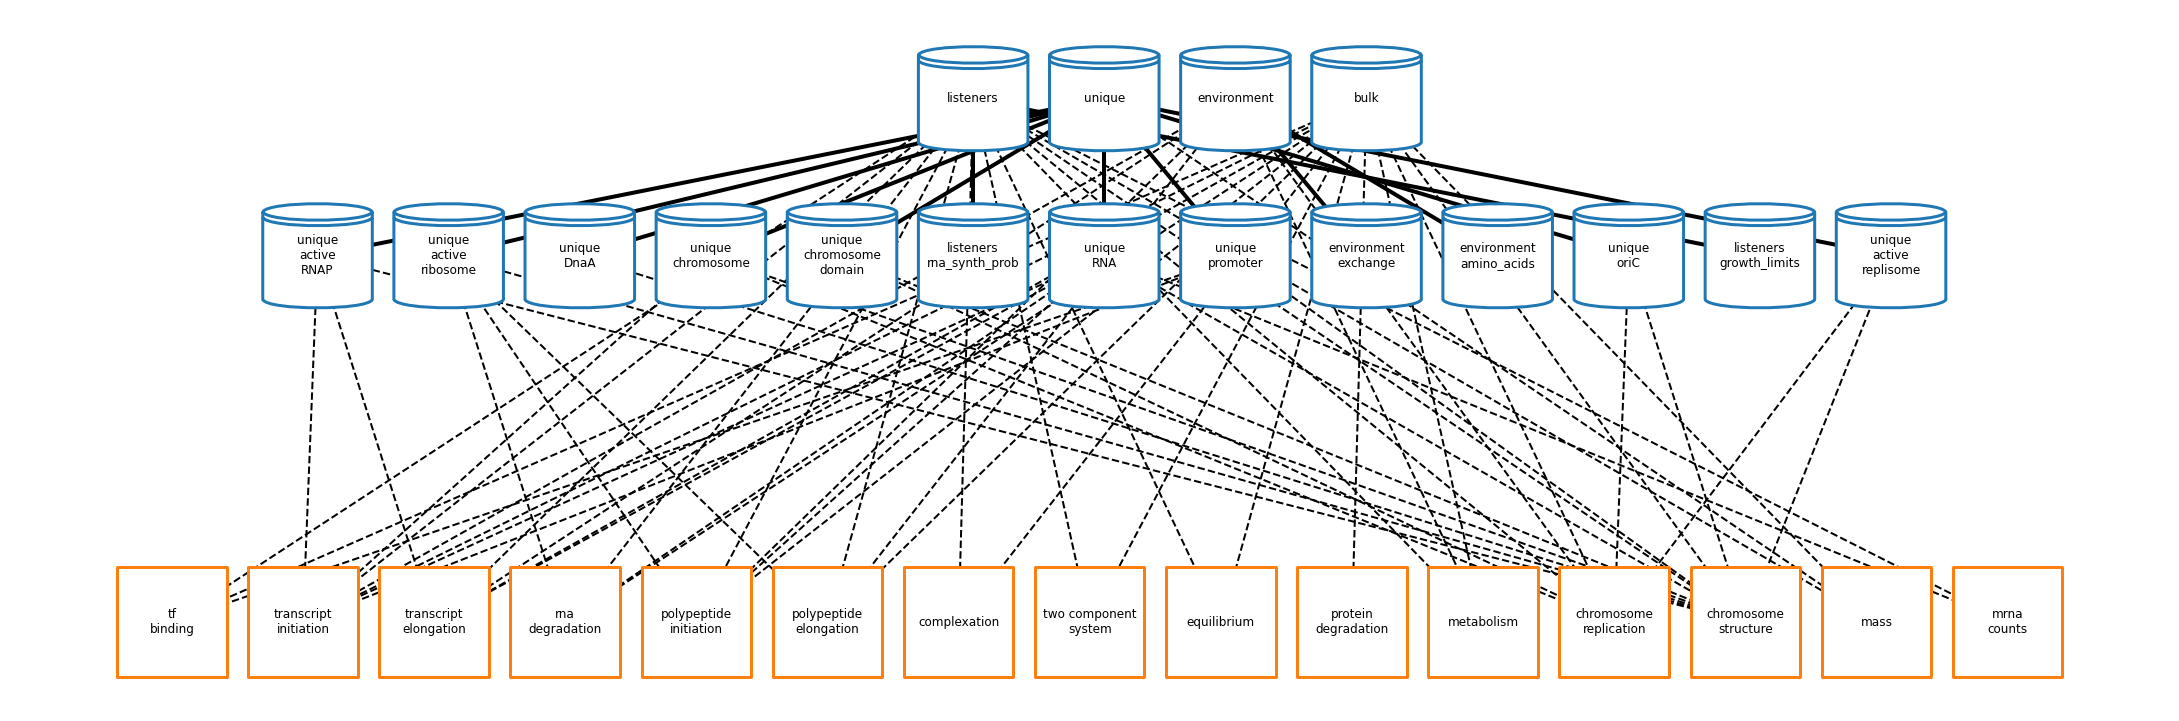

In [15]:
ecoli_composite = Composite({
    'processes': sim.ecoli.processes,
    'topology': sim.ecoli.topology,
})
topology_settings = get_ecoli_master_topology_settings()
fig = plot_topology(ecoli_composite, topology_settings)

## run simulation

In [8]:
output = sim.run()


Simulation ID: 1d4a4966-24cc-11ec-9d1b-8c85908ac627
Created: 10/03/2021 at 21:32:45
Completed in 16.71 seconds


In [9]:
print(output['listeners']['mass'].keys())

dict_keys(['cell_mass', 'dry_mass', 'water_mass', 'rnaMass', 'rRnaMass', 'tRnaMass', 'mRnaMass', 'dnaMass', 'proteinMass', 'smallMoleculeMass', 'volume', 'proteinMassFraction', 'rnaMassFraction', 'growth', 'instantaniousGrowthRate', 'dryMassFoldChange', 'proteinMassFoldChange', 'rnaMassFoldChange', 'smallMoleculeFoldChange'])


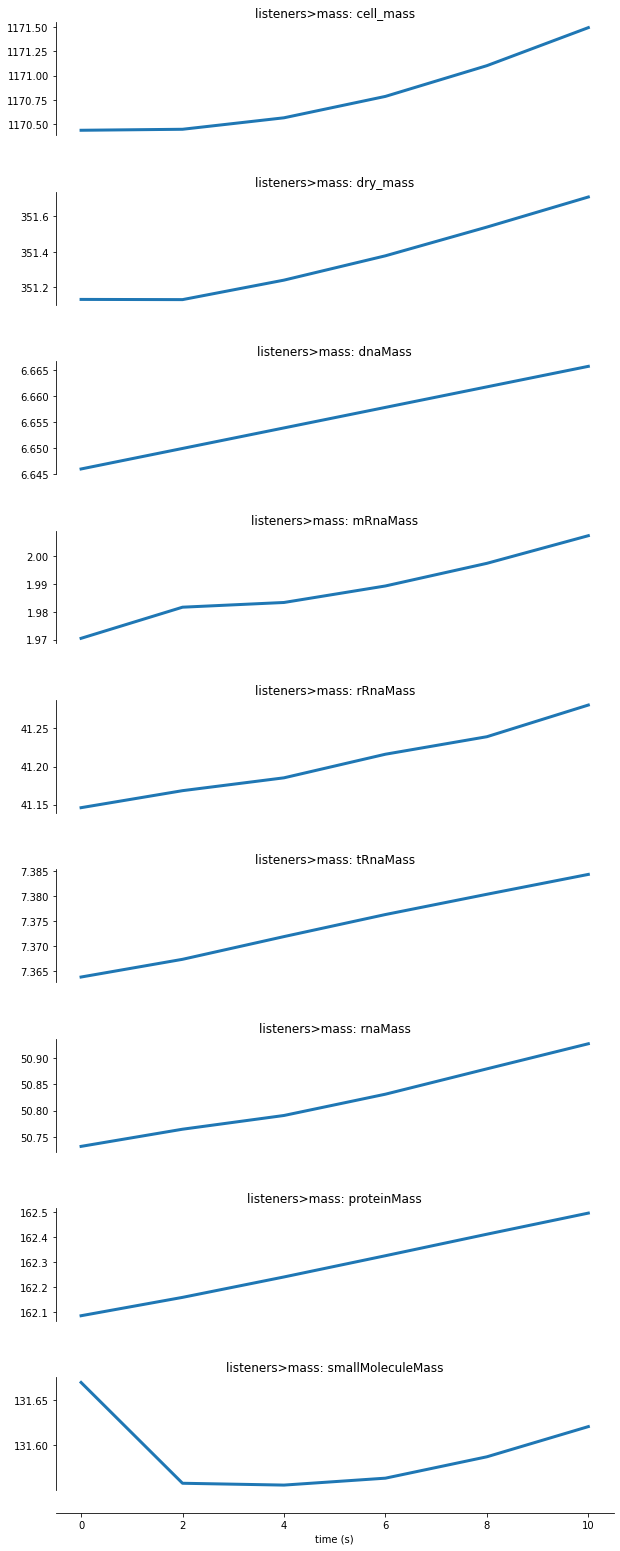

In [10]:
# plot 
fig = plot_variables(
    output, 
    variables=[
        ('listeners', 'mass', 'cell_mass'), 
        ('listeners', 'mass', 'dry_mass'), 
        ('listeners', 'mass', 'dnaMass'), 
        ('listeners', 'mass', 'mRnaMass'), 
        ('listeners', 'mass', 'rRnaMass'), 
        ('listeners', 'mass', 'tRnaMass'), 
        ('listeners', 'mass', 'rnaMass'), 
        ('listeners', 'mass', 'proteinMass'), 
        ('listeners', 'mass', 'smallMoleculeMass'), 
    ],
    column_width=10, row_height=3, row_padding=0.5)